<a href="https://colab.research.google.com/github/VipanchiKatthula/DocumentSimilarity_With_POSTags/blob/master/JaccardSimilarity_using_POS_Tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk.tag import pos_tag
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
!pip install -q xlrd
!git clone https://github.com/VipanchiKatthula/DocumentSimilarity_With_POSTags.git

Cloning into 'DocumentSimilarity_With_POSTags'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [3]:
UIC =  open('DocumentSimilarity_With_POSTags/Data/UIC.txt',encoding= "utf8", mode = 'r')
a = UIC.read()
import re
b = re.sub(r"[^a-z\s]+",' ',a.lower()) #Removing punctuation
print(b[1:500])

thank you   
the contributions we receive from our community of readers  editors and donors will keep us strong in   we ask you  humbly  to help us improve wikipedia by answering a few questions  thanks for your participation this survey powered by a third party service  please see the survey privacy statement 
university of illinois at chicago
from wikipedia  the free encyclopedia
jump to navigationjump to search
 university of illinois  chicago  redirects here  for the private university in c


In [4]:
c = word_tokenize(b)
print(c[1:20])

['you', 'the', 'contributions', 'we', 'receive', 'from', 'our', 'community', 'of', 'readers', 'editors', 'and', 'donors', 'will', 'keep', 'us', 'strong', 'in', 'we']


In [5]:
wordtags = pos_tag(c)
print(wordtags[1:20])

[('you', 'PRP'), ('the', 'DT'), ('contributions', 'NNS'), ('we', 'PRP'), ('receive', 'VBP'), ('from', 'IN'), ('our', 'PRP$'), ('community', 'NN'), ('of', 'IN'), ('readers', 'NNS'), ('editors', 'NNS'), ('and', 'CC'), ('donors', 'NNS'), ('will', 'MD'), ('keep', 'VB'), ('us', 'PRP'), ('strong', 'JJ'), ('in', 'IN'), ('we', 'PRP')]


In [6]:
UICcount= Counter([j for i,j in wordtags])
print(UICcount)

Counter({'NN': 1673, 'JJ': 780, 'IN': 662, 'NNS': 481, 'DT': 438, 'VBD': 178, 'VBN': 144, 'CC': 140, 'VBP': 127, 'RB': 92, 'VBZ': 77, 'VBG': 68, 'TO': 64, 'VB': 61, 'CD': 40, 'PRP': 25, 'JJS': 23, 'JJR': 22, 'WDT': 15, 'PRP$': 14, 'MD': 11, 'WP': 9, 'NNP': 8, 'WRB': 7, 'RBR': 6, 'EX': 6, 'RP': 3, 'PDT': 3, 'RBS': 3, 'FW': 2})


In [7]:
ESPN =  open('DocumentSimilarity_With_POSTags/Data/ESPN.txt',encoding= "utf8", mode = 'r')
a = ESPN.read()
b = re.sub(r"[^a-z\s]+",' ',a.lower()) #Removing punctuation
ESPNCount = Counter([j for i,j in pos_tag(word_tokenize(b))])
print(ESPNCount)

Counter({'NN': 515, 'IN': 185, 'JJ': 182, 'DT': 156, 'NNS': 113, 'VBD': 98, 'RB': 61, 'VB': 58, 'VBP': 56, 'CC': 51, 'PRP': 48, 'TO': 45, 'VBG': 44, 'VBZ': 44, 'PRP$': 43, 'VBN': 29, 'CD': 20, 'WP': 18, 'MD': 13, 'RP': 13, 'JJR': 11, 'JJS': 7, 'WRB': 6, 'WDT': 4, 'RBR': 3, 'FW': 1, 'PDT': 1})


In [8]:
NYTimes =  open('DocumentSimilarity_With_POSTags/Data/NYTimes.txt',encoding= "utf8", mode = 'r')
a = NYTimes.read()
b = re.sub(r"[^a-z\s]+",' ',a.lower()) #Removing punctuation
NYTimesCount = Counter([j for i,j in pos_tag(word_tokenize(b))])
print(NYTimesCount)

Counter({'NN': 598, 'IN': 316, 'JJ': 287, 'NNS': 235, 'DT': 206, 'VBD': 123, 'PRP': 110, 'VBP': 89, 'RB': 86, 'VB': 83, 'CC': 61, 'VBG': 57, 'VBZ': 54, 'TO': 54, 'VBN': 52, 'PRP$': 47, 'WP': 19, 'MD': 19, 'WRB': 18, 'CD': 12, 'RP': 9, 'JJR': 8, 'WDT': 5, 'RBR': 5, 'EX': 4, 'RBS': 4, 'NNPS': 3, 'FW': 2, 'PDT': 1, 'NNP': 1})


***Jaccard Similarity***

In [26]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

print("Jacard Similarity between UIC and ESPN: ",jaccard_similarity(UICcount, ESPNCount),"\n Jaccard Similarity between UIC and New York Times: ",jaccard_similarity(UICcount, NYTimesCount))

Jacard Similarity between UIC and ESPN:  0.9 
 Jaccard Similarity between UIC and New York Times:  0.9354838709677419


***Weighted Jaccard Similarity between the links with UIC***

In [0]:
def weighted_jaccard_similarity(list1, list2):
  minlist = []
  maxlist = []
  for i in list1:
    minlist.append(min(list1[i],list2[i]))
    maxlist.append(max(list1[i],list2[i]))
    return (sum(minlist)/sum(maxlist))

print("Weighted Jacard Similarity between UIC and ESPN: ",weighted_jaccard_similarity(UICcount,ESPNCount),"\nWeighted Jaccard Similarity between UIC and New York Times: ",weighted_jaccard_similarity(UICcount,NYTimesCount))

***Word Embeddding***

In [0]:
from sklearn.decomposition import PCA
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [30]:
!pip install glove_python
#importing the glove library
from glove import Corpus, Glove


     |████████████████████████████████| 266kB 8.7MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=702673 sha256=be410c9bc0a5f83a186d287c5833db9bff6434d105aff60f1a5b1fcb07258d43
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [31]:
a = UIC.read()
lines=[]
with open('DocumentSimilarity_With_POSTags/Data/UIC.txt',encoding= "utf8", mode = 'r') as t1: 
    for line in t1:
      b = re.sub(r"[^a-z\s]+",' ',line.lower())
      lines.append(b.split())
      lines = [x for x in lines if x != []]  #Removing the empty list blocks from the list
print(lines)    

[['thank', 'you'], ['the', 'contributions', 'we', 'receive', 'from', 'our', 'community', 'of', 'readers', 'editors', 'and', 'donors', 'will', 'keep', 'us', 'strong', 'in', 'we', 'ask', 'you', 'humbly', 'to', 'help', 'us', 'improve', 'wikipedia', 'by', 'answering', 'a', 'few', 'questions', 'thanks', 'for', 'your', 'participation', 'this', 'survey', 'powered', 'by', 'a', 'third', 'party', 'service', 'please', 'see', 'the', 'survey', 'privacy', 'statement'], ['university', 'of', 'illinois', 'at', 'chicago'], ['from', 'wikipedia', 'the', 'free', 'encyclopedia'], ['jump', 'to', 'navigationjump', 'to', 'search'], ['university', 'of', 'illinois', 'chicago', 'redirects', 'here', 'for', 'the', 'private', 'university', 'in', 'chicago', 'see', 'university', 'of', 'chicago'], ['university', 'of', 'illinois', 'at', 'chicago'], ['university', 'of', 'illinois', 'at', 'chicago', 'circle', 'logo', 'svg'], ['motto', 'teach', 'research', 'serve', 'care'], ['type', 'public'], ['aanapisi'], ['hsi'], ['esta

In [0]:
# creating a corpus object
corpus = Corpus()
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(lines, window=10)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=10, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

In [34]:
print (glove.word_vectors[glove.dictionary['classes']])
print (glove.word_vectors[glove.dictionary['illinois']])

[-0.04892493 -0.00884235 -0.02275484 -0.01799411  0.04189451  0.01734494
  0.02254222  0.04345984  0.04456235  0.0073217 ]
[ 0.77385203  0.33109122 -0.55842185  0.6615071   0.24885601 -0.03955677
  0.37961517 -0.37390511 -0.56367387  0.64075613]


In [36]:
unique_words  = list(set(c))
print(unique_words)

['becoming', 'to', 'bathroom', 'such', 'fully', 'amiridis', 'live', 'contains', 'horizontal', 'they', 'plan', 'renovated', 'illinois', 'americans', 'higher', 'statistics', 'consolidated', 'spring', 'based', 'major', 'abbreviations', 'you', 'historical', 'december', 'convenience', 'consists', 'lamar', 'these', 'division', 'september', 'rings', 'upgrading', 'mu', 'nd', 'languages', 'department', 'gymnastics', 'realizing', 'beckham', 'median', 'pacific', 'history', 'lupe', 'merrill', 'nacubo', 'core', 'met', 'facility', 'designated', 'war', 'its', 'process', 'made', 'needed', 'before', 'titles', 'defeated', 'fall', 'work', 'gold', 'thank', 'cable', 'vice', 'association', 'intermission', 'sustainability', 'addams', 'instant', 'et', 'qs', 'curriculum', 'alpha', 'demonstrated', 'north', 'polytechnical', 'universities', 'rocks', 'avoids', 'federally', 'halls', 'than', 'five', 'ten', 'volunteer', 'attainable', 'urbana', 'three', 'maintenance', 'courtyard', 'against', 'answering', 'school', 'cr

In [37]:
import pandas as pd
word_glove_vectors  = np.array( [ glove.word_vectors[glove.dictionary[ word ]] for word in unique_words ])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9
becoming,-0.033474,0.016182,0.032461,0.006344,-0.000979,-0.024570,-0.026553,0.000263,0.094022,-0.081987
to,0.583526,0.330528,-0.267084,0.256270,0.174211,0.209937,0.339216,-0.290689,-0.299059,0.393812
bathroom,0.030777,-0.037093,0.025471,-0.018334,-0.025746,-0.005655,-0.034487,0.011988,-0.023748,0.000015
such,-0.038387,-0.063216,-0.005501,-0.041555,0.011532,-0.046948,-0.055885,0.043605,0.032120,0.011637
fully,-0.096724,-0.077303,0.033603,-0.104374,0.000403,-0.026018,-0.058562,0.085686,0.062275,-0.054007
...,...,...,...,...,...,...,...,...,...,...
well,-0.064320,0.017347,-0.029038,-0.013756,-0.006896,0.009982,-0.031736,-0.026096,0.044503,0.009880
home,-0.011372,-0.018550,0.027487,-0.051509,-0.055863,-0.022258,-0.008748,0.034932,0.066842,-0.072034
june,0.081911,0.010131,-0.082839,-0.112805,-0.000969,0.032421,0.029644,-0.056864,-0.039273,0.097716
links,0.000348,0.021570,-0.020152,0.003068,-0.003112,0.019507,0.030051,-0.009814,-0.024517,-0.049896


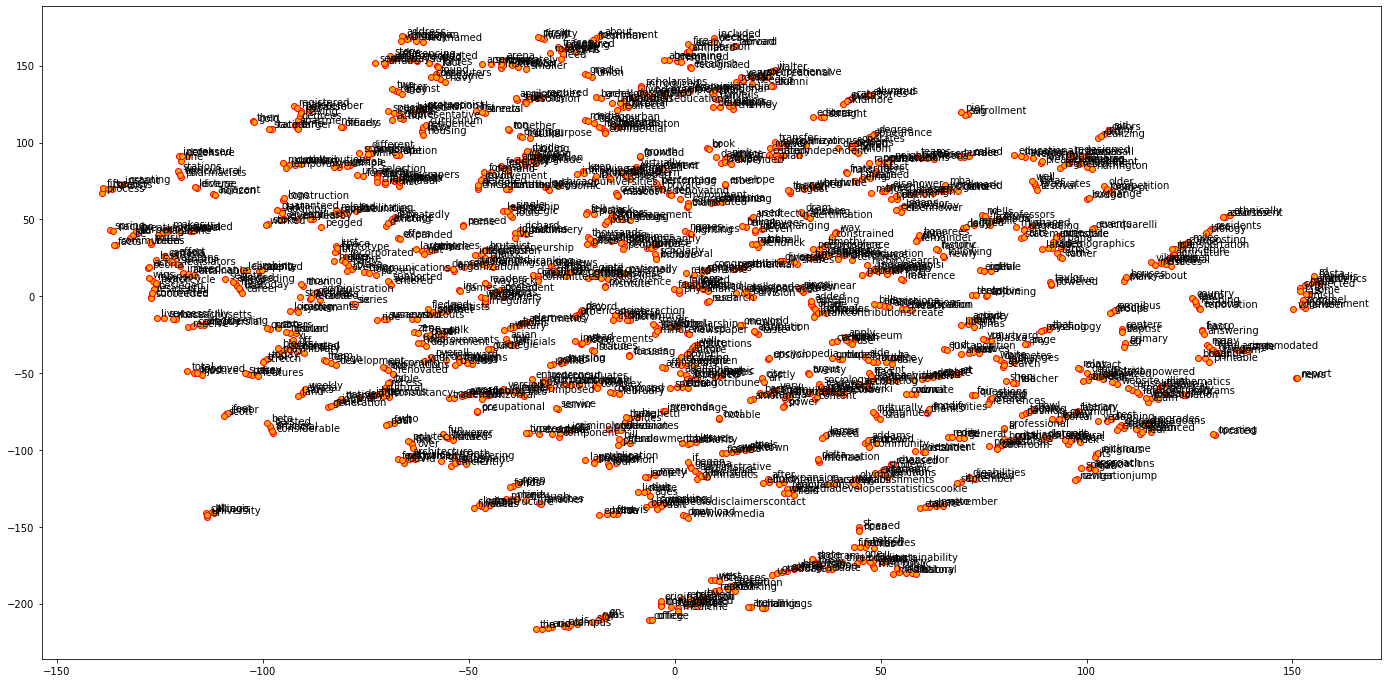

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(24, 12))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [0]:
plt.figure(figsize=(96, 48))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [53]:
a = UIC.read()
sentences=[]
with open('DocumentSimilarity_With_POSTags/Data/UIC.txt',encoding= "utf8", mode = 'r') as t1: 
    for line in t1:
      b = re.sub(r"[^a-z\s]+",' ',line.lower())
      word_tokens = b.split()
      filtered_words = [w for w in word_tokens if not w in stop_words] 
      sentences.append(filtered_words)
      sentences = [x for x in sentences if x != []]  #Removing the empty list blocks from the list
print(sentences)    

[['thank'], ['contributions', 'receive', 'community', 'readers', 'editors', 'donors', 'keep', 'us', 'strong', 'ask', 'humbly', 'help', 'us', 'improve', 'wikipedia', 'answering', 'questions', 'thanks', 'participation', 'survey', 'powered', 'third', 'party', 'service', 'please', 'see', 'survey', 'privacy', 'statement'], ['university', 'illinois', 'chicago'], ['wikipedia', 'free', 'encyclopedia'], ['jump', 'navigationjump', 'search'], ['university', 'illinois', 'chicago', 'redirects', 'private', 'university', 'chicago', 'see', 'university', 'chicago'], ['university', 'illinois', 'chicago'], ['university', 'illinois', 'chicago', 'circle', 'logo', 'svg'], ['motto', 'teach', 'research', 'serve', 'care'], ['type', 'public'], ['aanapisi'], ['hsi'], ['established'], ['academic', 'affiliations'], ['universities', 'research', 'association'], ['great', 'cities', 'universities'], ['endowment', 'billion', 'entire', 'u', 'system'], ['chancellor', 'michael', 'amiridis'], ['president', 'timothy', 'l', 

***Principle Component Analysis:***

In [0]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# train model
model = Word2Vec(sentences, min_count=1)

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

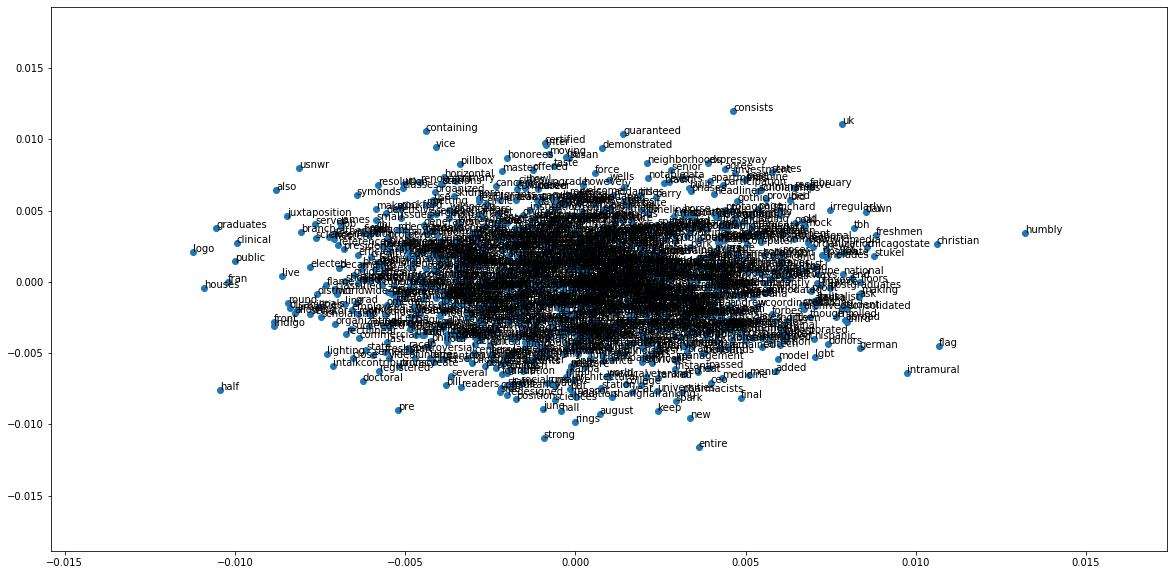

In [65]:
# create a scatter plot of the projection
pyplot.figure(figsize=(20,10))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

***Showing only first 25 words as the scatter plot is dense***

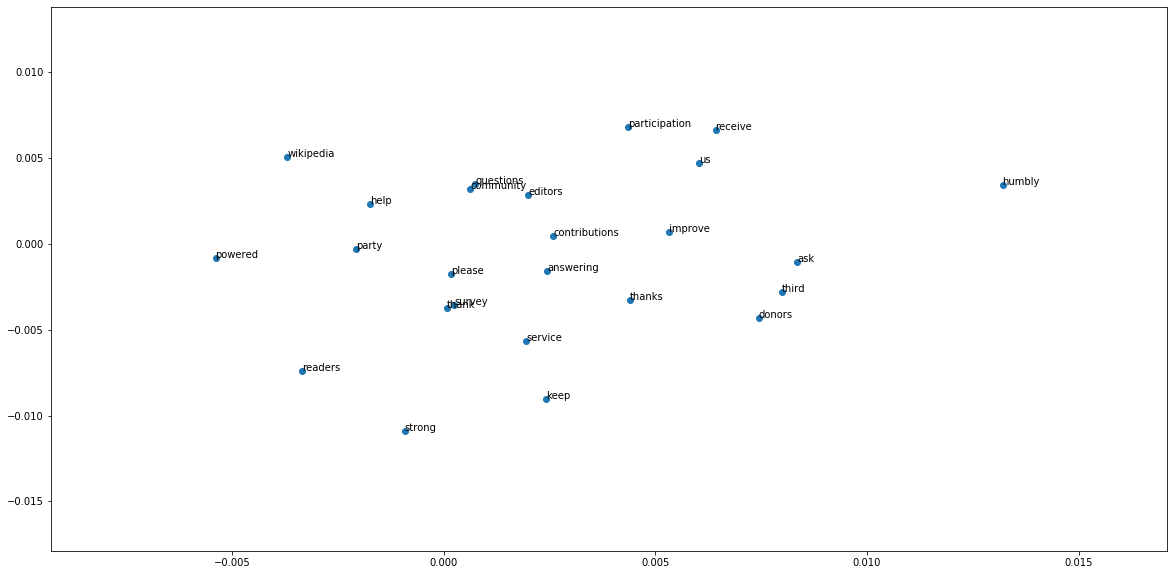

In [67]:
pyplot.figure(figsize=(20,10))
pyplot.scatter(result[:25, 0], result[:25, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[:25]):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()